# Classification with the perceptron and logistic regression

__Individual assignment 2 - EDAP01 - Artificial Intelligence__

Author of the assignment: Pierre Nugues

__Student name__: Hicham Mohamad (hi8826mo-s)

## Table of contents
1. [Linear Regression - Gradient Descent](#t1)
2. [Linear Classifier - Perceptron](#t2)
3. [Linear Classifier - Logistic Regression](#t3)
4. [Programming logistic regression with popular APIs](#t4)
5. [Reading](#t5)

## Objectives

The objectives of this second assignment are to:

1.  Write a **linear regression** program using **gradient descent**;
2.  Write **linear classifiers** using the **perceptron** algorithm and **logistic regression**;
3.  Experiment variations of the algorithms;
4.  Evaluate your classifiers;
5.  Experiment with popular tools;
6.  Read a **scientific article** on optimization techniques and comment it;
7.  Present your code, results, and comments in a **short dissertation**.

## Overview

The gradient descent is a basic technique to estimate linear **discriminant functions**. You will first use the gradient descent method to implement linear regression. You will then program the perceptron algorithm. Finally, you will improve the **threshold function** with the logistic curve (logistic regression). You will try various configurations and study their influence on the learning speed and accuracy.

##  Programming language
As programming language, you will use Python and write your code in this notebook.

You need to have a comprehensive Python distribution such as Anaconda (https://www.anaconda.com/products/individual). This distribution is available on the student computers at the computer science department.
Finally, you start a notebook by typing:

`jupyter lab`

in a terminal window and you select the notebook by clicking on it in the left pane.
You run the pieces of code by typing shift+enter.

## Imports
Imports you may use

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## 1 - Linear Regression <a name="t1"/> 

You will implement the gradient descent method as explained in pages 719--720 in Russell-Norvig and in the slides to compute **regression lines**. You will implement the **stochastic** and **batch** versions of the algorithm.

You must try to do it yourself first. If you encounter difficulties, you also have the solution to this exercise in the section _Solution to linear regression_ below.

### Your implementation of linear regression
You will implement a regression program to predict the counts of **A's** in a text from the total count of letters. You will apply it on two data sets corresponding to letter counts in the 15 chapters of the French and English versions of **Salammbô**, where the first column is the total count of characters and the second one, the count of A's. 

Start with either French or English and when your program ready, test it on the other language.

In [2]:
stat_fr = np.array([[36961, 2503],
                      [43621, 2992],
                      [15694, 1042],
                      [36231, 2487],
                      [29945, 2014],
                      [40588, 2805],
                      [75255, 5062],
                      [37709, 2643],
                      [30899, 2126],
                      [25486, 1784],
                      [37497, 2641],
                      [40398, 2766],
                      [74105, 5047],
                      [76725, 5312],
                      [18317, 1215]])

stat_en = np.array([[35680, 2217],
                      [42514, 2761],
                      [15162, 990],
                      [35298, 2274],
                      [29800, 1865],
                      [40255, 2606],
                      [74532, 4805],
                      [37464, 2396],
                      [31030, 1993],
                      [24843, 1627],
                      [36172, 2375],
                      [39552, 2560],
                      [72545, 4597],
                      [75352, 4871],
                      [18031, 1119]])

From the datasets above, tell what is $\mathbf{X}$ and $\mathbf{y}$. Extract:
1. The $\mathbf{X}$ matrix, where you will have a column to model the intercept;
2. The $\mathbf{y}$ vector

from these arrays.

In [3]:
# Write your code here
X_fr = np.concatenate((np.ones((15,1), dtype=int), stat_fr[:,:1]), axis=1)
print("French X matrix \n", X_fr)
y_fr = stat_fr[:,-1:]
print("French y vector \n", y_fr)
#y.shape
#X.shape

French X matrix 
 [[    1 36961]
 [    1 43621]
 [    1 15694]
 [    1 36231]
 [    1 29945]
 [    1 40588]
 [    1 75255]
 [    1 37709]
 [    1 30899]
 [    1 25486]
 [    1 37497]
 [    1 40398]
 [    1 74105]
 [    1 76725]
 [    1 18317]]
French y vector 
 [[2503]
 [2992]
 [1042]
 [2487]
 [2014]
 [2805]
 [5062]
 [2643]
 [2126]
 [1784]
 [2641]
 [2766]
 [5047]
 [5312]
 [1215]]


In [4]:
X_en = np.concatenate((np.ones((15,1), dtype=int), stat_en[:,:1]), axis=1)
#X_en = np.concatenate((np.ones((15,1)), stat_en[:,:1]), axis=1)
print("English X matrix \n", X_en)
y_en = stat_en[:,-1:]
print("English y vector \n", y_en)
X_en.shape

English X matrix 
 [[    1 35680]
 [    1 42514]
 [    1 15162]
 [    1 35298]
 [    1 29800]
 [    1 40255]
 [    1 74532]
 [    1 37464]
 [    1 31030]
 [    1 24843]
 [    1 36172]
 [    1 39552]
 [    1 72545]
 [    1 75352]
 [    1 18031]]
English y vector 
 [[2217]
 [2761]
 [ 990]
 [2274]
 [1865]
 [2606]
 [4805]
 [2396]
 [1993]
 [1627]
 [2375]
 [2560]
 [4597]
 [4871]
 [1119]]


(15, 2)

- Scale the arrays so that they fit in the range [0, 1] on the $x$ and $y$ axes. 

### Function to scale the data

In [5]:
# Write your code here
def scale(Xy):
    # Return the maximum of an array or maximum along an axis.
    maxima = np.amax(Xy, axis=0)
    
    # Extract a diagonal or construct a diagonal array.
    D = np.diag(maxima)
    
    # Compute the (multiplicative) inverse of a matrix.
    D_inv = np.linalg.inv(D)
    
    # matrix multiplication, equivalent to dot()
    Xy = Xy @ D_inv
    
    return (Xy, maxima)

#### we scale the arrays so that they fit in the range [0, 1] on the  𝑥  and  𝑦  axes.

In [6]:
scaled = True
debug = False

alpha = 1.0e-10
if scaled:
    X_en, maxima_X_en = scale(X_en)
    y_en, maxima_y_en = scale(y_en)
    maxima_en = np.concatenate((maxima_X_en, maxima_y_en))
        
    alpha = 1.0
    print("- Data Arrays are SCALED -")
    print(maxima_en)
    #print(maxima_en.reshape(-1,1))
    
    print(y_en.shape)
    print(X_en.shape)

- Data Arrays are SCALED -
[    1 75352  4871]
(15, 1)
(15, 2)


### Gradient descent

Implement the **descent functions**. You will pass `X`, `y`, the learning rate in the $\alpha$ variable, the initial weight vector in `w`, the tolerance in the $\epsilon$ variable, the maximal number of epochs in `epochs`. You will return `w`.

#### Function to compute the sum of squared errors

In [7]:
def sse(X, y, w):
    error = y - X @ w
    return error.T @ error

#### Batch descent
Function to apply a batch descent: we have to cycle <br>
through all the training data for every step, and there may be many steps.

In [8]:
# Write your code here
def fit_batch(X, y, alpha, w,
                  epochs=500,
                  epsilon=1.0e-5):
    """
    Batch gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs
    logs = []
    alpha /= len(X)
    
    # the iteration step considers all the data points
    #for epoch in range(1, 500):
    for epoch in range(1, epochs):
        
        # the loss function
        loss = y - X @ w
        #print(loss)
        gradient = X.T @ loss
        #w_old = w
        
        # update/learning rule
        w = w + alpha * gradient
        
        logs += (w, alpha, sse(X, y, w))
        
        #if np.linalg.norm(w - w_old) / np.linalg.norm(w) < 0.0005:
        if np.linalg.norm(gradient) < epsilon:
            #print("Epoch", epoch)
            break
            
    print("Epoch", epoch)        
    return w

#### Stochastic descent
Function to apply a stochastic descent: where we consider <br>
only a single training point at a time, taking a step after each one.

In [9]:
# Write your code here
def fit_stoch(X, y, alpha, w,
                  epochs=500,
                  epsilon=1.0e-5):
    """
    Stochastic gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs, logs_stoch
    logs = []
    logs_stoch = []
    
    random.seed(0)
    idx = list(range(len(X)))
    
    #for epoch in range(500):
    for epoch in range(epochs):
        random.shuffle(idx)
        #w_old = w
        
        # we carry out the updates using ONE single data point at a time
        for i in idx:
            
            # the loss function
            loss = y[i] - X[i] @ w
            #gradient = loss * X[i].reshape(-1, 1)
            gradient = loss * np.array([X[i]]).T
            
            # update/learning rule
            w = w + alpha * gradient
            logs_stoch += (w, alpha, sse(X, y, w))
            
        #if np.linalg.norm(w - w_old) / np.linalg.norm(w) < 0.005:
        if np.linalg.norm(gradient) < epsilon:   
            #print("Epoch", epoch)
            break
            
        logs += (w, alpha, sse(X, y, w))
    
    print("Epoch", epoch)
    return w

#### Applying batch descent

- Apply the batch descent and print the final **weight values** 

In [10]:
# Write your code here
print("===Batch descent=== \n")
w = np.zeros(X_en.shape[1]).reshape((-1, 1))

# compute the weights using batch descent version of GD algorithm
#w = batch_descent(X, y, alpha, w)
w = fit_batch(X_en, y_en, alpha, w, 500, 1.0e-5)

print("the normalized Weights", w, "\n")
print("Summed squared error, SSE =", sse(X_en, y_en, w), "\n")

if scaled:
    maxima_en_vec = maxima_en.reshape(-1, 1)
    w = maxima_en_vec[-1, 0] * (w / maxima_en_vec[:-1, 0:1])
    
    print("Restored weights", w, "\n")
    #print("The coefficient is ", w[1,:])
    #print("The intercept is ", w[0,:], "\n")
    
if debug:
    print("Logs", logs)

===Batch descent=== 

Epoch 236
the normalized Weights [[-7.31744724e-04]
 [ 9.94697306e-01]] 

Summed squared error, SSE = [[0.00086294]] 

Restored weights [[-3.56432855]
 [ 0.06430049]] 



- Visualize the points of your dataset as well as the **regression lines** you obtain using **matplotlib** or another similar program.

#### We restore the coordinates

In [11]:
x_fig = [X_en[i][1] * maxima_X_en[1] for i in range(len(X_en))]
y_fig = [yi * maxima_y_en for yi in y_en]
print(x_fig)
print(y_fig)

[35680.0, 42514.0, 15162.0, 35298.0, 29799.999999999996, 40255.0, 74532.0, 37464.0, 31030.000000000004, 24843.0, 36172.0, 39552.0, 72545.0, 75352.0, 18031.0]
[array([2217.]), array([2761.]), array([990.]), array([2274.]), array([1865.]), array([2606.]), array([4805.]), array([2396.]), array([1993.]), array([1627.]), array([2375.]), array([2560.]), array([4597.]), array([4871.]), array([1119.])]


#### We plot the points and the regression line

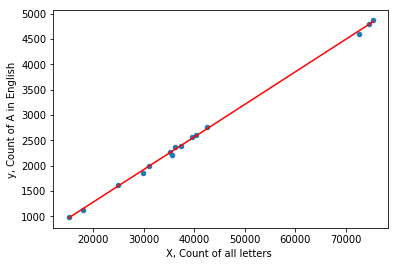

In [12]:
# Write your code here
# plotting values

# visualize the data points
plt.scatter(x_fig, y_fig, s=20)

plt.xlabel('X, Count of all letters ')
plt.ylabel('y, Count of A in English')

# plotting the regression line
plt.plot([min(x_fig), max(x_fig)],
         [[1, min(x_fig)] @ w, [1, max(x_fig)] @ w], color='r')

#plt.title('Linear regression - Batch')
plt.show()

#### Sum of squared errors - Batch gradient

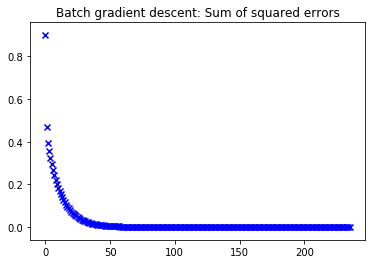

In [13]:
plt.scatter(range(len(logs[2::3])), logs[2::3], c='b', marker='x')
plt.title("Batch gradient descent: Sum of squared errors")
plt.show()

#### Stochastic descent

In [14]:
# Write your code here
print("===Stochastic descent=== \n")
w = np.zeros(X_en.shape[1]).reshape((-1, 1))

# using the stochastic version
w = fit_stoch(X_en, y_en, alpha, w, 500, 1.0e-5)

print("Weights", w, "\n")
print("Summed squared error, SSE = ", sse(X_en, y_en, w), "\n")

if scaled:
    maxima_en_vec = maxima_en.reshape(-1, 1)
    w = maxima_en_vec[-1, 0] * (w / maxima_en_vec[:-1, 0:1])
    print("Restored weights", w, "\n")
    #print("The coefficient is ", w[1,:])
    #print("The intercept is ", w[0,:], "\n")
    
if debug:
    print("Logs", logs)
    print("Logs stoch.", logs_stoch)

===Stochastic descent=== 

Epoch 499
Weights [[0.00339067]
 [0.99373072]] 

Summed squared error, SSE =  [[0.00105848]] 

Restored weights [[16.51596702]
 [ 0.06423801]] 



- Visualize the points of your dataset as well as the regression lines you obtain using matplotlib or another similar program.

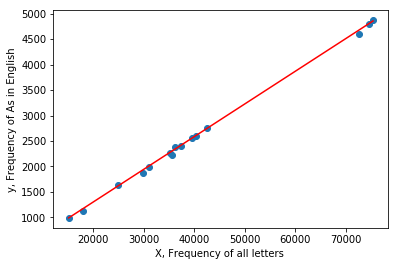

In [15]:
# Write your code here
plt.scatter(x_fig, y_fig)

plt.xlabel('X, Frequency of all letters ')
plt.ylabel('y, Frequency of As in English')

plt.plot([min(x_fig), max(x_fig)],
         [[1, min(x_fig)] @ w, [1, max(x_fig)] @ w], color='r')
plt.show()

#### Sum of squared errors by epoch - Stochastic gradient

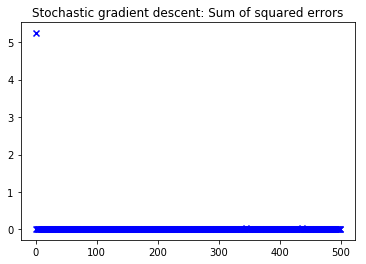

In [16]:
plt.scatter(range(len(logs[2::3])), logs[2::3], c='b', marker='x')
plt.title("Stochastic gradient descent: Sum of squared errors")
plt.show()

### A solution to linear regression

To help you start this assignment, your instructor wrote two Python notebooks that solve this exercise on linear regression. You can find them here: https://github.com/pnugues/ilppp/tree/master/programs/ch04/python
The first notebook, `gradient_descent.ipynb`, only uses Python and vector operations such as the dot product that are in the `vector.py` file.
The second notebook, `gradient_descent_numpy.ipynb`, uses Numpy. It is more compact, but you need to know a bit of numpy.

To run these programs, download them on your computer as well as the other program in the import list: vector.py

The programs are also available as Python programs from
https://github.com/pnugues/ilppp/tree/master/programs/ch04/python

## Classification
You will use the same data set as for linear regression, but this time to classify a chapter as French or English. Given a pair of numbers corresponding the letter count and count of _A_, you will predict the language:
1. $\mathbf{x} = (35680, 2217)$ $\to$ $y$ = English
2. $\mathbf{x} = (37497, 2641)$ $\to$ $y$ = French

### The dataset
You will use the arrays below:
1. `X` contains the counts of letters and of _A_ s as well as a column of ones for the intercept;
2. `y` contains the classes, where 0 is for English and 1 for French.

In [121]:
X = [[1.0, 35680.0, 2217.0],
     [1.0, 42514.0, 2761.0],
     [1.0, 15162.0, 990.0],
     [1.0, 35298.0, 2274.0],
     [1.0, 29800.0, 1865.0],
     [1.0, 40255.0, 2606.0],
     [1.0, 74532.0, 4805.0],
     [1.0, 37464.0, 2396.0],
     [1.0, 31030.0, 1993.0],
     [1.0, 24843.0, 1627.0],
     [1.0, 36172.0, 2375.0],
     [1.0, 39552.0, 2560.0],
     [1.0, 72545.0, 4597.0],
     [1.0, 75352.0, 4871.0],
     [1.0, 18031.0, 1119.0],
     [1.0, 36961.0, 2503.0],
     [1.0, 43621.0, 2992.0],
     [1.0, 15694.0, 1042.0],
     [1.0, 36231.0, 2487.0],
     [1.0, 29945.0, 2014.0],
     [1.0, 40588.0, 2805.0],
     [1.0, 75255.0, 5062.0],
     [1.0, 37709.0, 2643.0],
     [1.0, 30899.0, 2126.0],
     [1.0, 25486.0, 1784.0],
     [1.0, 37497.0, 2641.0],
     [1.0, 40398.0, 2766.0],
     [1.0, 74105.0, 5047.0],
     [1.0, 76725.0, 5312.0],
     [1.0, 18317.0, 1215.0]]
y = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

We visualize it

In [122]:
x_fr = [x[1] for i, x in enumerate(X) if y[i] == 1]
y_fr = [x[2] for i, x in enumerate(X) if y[i] == 1]
x_en = [x[1] for i, x in enumerate(X) if y[i] == 0]
y_en = [x[2] for i, x in enumerate(X) if y[i] == 0]

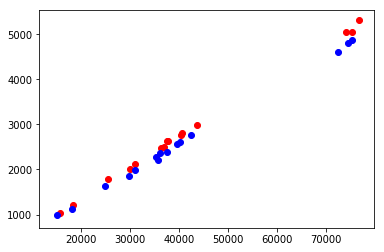

In [123]:
plt.scatter(x_fr, y_fr, color='red')
plt.scatter(x_en, y_en, color='blue')

### Normalize the dataset

Gradient descent algorithms can be very sensitive to the range. Therefore, we normalize the dataset.

In [124]:
def normalize(observations):
    maxima = [max([obs[i] for obs in observations]) for i in range(len(observations[0]))]
    return ([[obs[i] / maxima[i]
              for i in range(len(observations[0]))] for obs in observations],
            maxima)

In [125]:
X_norm, maxima = normalize(X)
X_norm

[[1.0, 0.4650374714890844, 0.4173569277108434],
 [1.0, 0.5541088302378625, 0.5197665662650602],
 [1.0, 0.19761485826001954, 0.18637048192771086],
 [1.0, 0.460058651026393, 0.42808734939759036],
 [1.0, 0.3884001303356142, 0.3510918674698795],
 [1.0, 0.5246660149885957, 0.49058734939759036],
 [1.0, 0.9714173998044966, 0.9045557228915663],
 [1.0, 0.4882893450635386, 0.4510542168674699],
 [1.0, 0.4044314108830238, 0.37518825301204817],
 [1.0, 0.32379276637341153, 0.30628765060240964],
 [1.0, 0.47144998370804825, 0.4471009036144578],
 [1.0, 0.5155034213098729, 0.4819277108433735],
 [1.0, 0.9455197132616487, 0.8653990963855421],
 [1.0, 0.9821049201694363, 0.916980421686747],
 [1.0, 0.2350081459758879, 0.21065512048192772],
 [1.0, 0.48173346366894754, 0.4711972891566265],
 [1.0, 0.5685369827305311, 0.5632530120481928],
 [1.0, 0.2045487129358097, 0.19615963855421686],
 [1.0, 0.47221896383186707, 0.46818524096385544],
 [1.0, 0.39028999674160963, 0.37914156626506024],
 [1.0, 0.5290061909416748, 

#### convert to numpy array

In [126]:
XXX_norm = np.array(X_norm)
#XXX_norm.shape[1]
#z1 = np.zeros(XXX_norm.shape[1])
#z = np.zeros(XXX_norm.shape[1]).reshape(-1,1)
#z1 = [0]*len(X_norm[0])
#XXX_norm
#X_norm[0]
#len(X_norm)
#z1

## 2 - The Perceptron <a name="t2"/>

1. Write the perceptron program as explained in pages 723--725 in Russell-Norvig and in the slides and run it on your data set. As suggested program structure, use two functions: 
 * `fit(X, y)` that will return `w` (the model). You can choose a stochastic or batch variant;
 * `predict(X, w)` that will return `y_hat`. You can encapsulate these functions in a class and, of course, add more parameters.
2. As a stop criterion, you will use the number of misclassified examples.
3. You will report the parameters you have used and the weight vector

You can use numpy or not. The next cells are just suggested steps. You can implement it your way.

### The `predict(X, w)` function
Write a `predict(X, w)` function that given a matrix of observations $\mathbf{X}$ and a weight vector $\mathbf{w}$ will return a $\mathbf{\hat{y}}$ vector classes (0 or 1)

####  Simple threshold activation function for the perceptron classifier

In [100]:
# Write your code here
#def hw_threshold(x,w):
def predict(X, w):
    thresh = X @ w
    #print(thresh.shape)
    #print(thresh)
    
    for i in range(0, len(thresh)):
        #return 1 if x @ w >= 0.0 else 0
        if thresh[i] >= 0.0:
            thresh[i] = 1.0
        else:
            thresh[i] = 0
            
    return thresh

### The `fit(X, y)` function

Write a `fit(X, y)` function that given a **matrix of observations** $\mathbf{X}$ and a **vector of responses** $\mathbf{y}$ will return a weight $\mathbf{w}$ vector. You may use the other arguments of the function, notably the number of misclassified examples to define the **stop condition**.

###### Stochastic descent Perceptron
Function to apply the stochastic descent: where we consider <br>
only a single training point at a time, taking a step after each one.

In [101]:
# Write your code here
import random
#import vector

def fit_stoch_perceptron(X, y, alpha,
              epochs=1000,
              max_misclassified=0,
              verbose=True):
    """
    Stochastic gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :epochs:
    :max_misclassified:
    :return:
    """
    global logs, logs_stoch
    logs = []
    logs_stoch = []
    
    random.seed(0)
    idx = list(range(len(X)))
    
    w = np.zeros(X.shape[1]).reshape((-1, 1))
    #w = np.zeros(X_norm[0])
    #w = [0]*len(X_norm[0])
    
    #for epoch in range(500):
    for epoch in range(epochs):
        random.shuffle(idx)
        #w_old = w
        
        sum_misclassified = 0
        for i in idx:
            
            # the loss function 
            
            # in case of gradient descent method
            #loss = y[i] - X[i] @ w    # here hw_gradient = x*w
            #gradient = loss * X[i].reshape(-1, 1)
            
            # in case of perceptron method
            #h_w = hw_threshold(X, w)
            h_w = predict(X, w)
            delta = y[i] - h_w[i]
                        
            if delta != 0:
                sum_misclassified += 1
                
            # in case of logistic regression
            #h_w = hw_logistic(w, X[i].reshape(-1, 1))
            #delta = (y[i] - h_w) * h_w * (1 - h_w)
            
            # the weight updating rule
            #w = w + alpha * gradient
            w = w + alpha * delta * X[i].reshape(-1, 1)
                       
            #logs_stoch += (w, alpha, sse(X, y, w))
        
        #print("Epochs: ", epoch)
        # stop criterion
        if sum_misclassified <= max_misclassified:
            #print("Epochs: ", epoch)
            break
         
        #print("Epochs: ", epoch)
        #if np.linalg.norm(w - w_old) / np.linalg.norm(w) < 0.005:
            #print("Epochs: ", epoch)
        #    break
            
        #logs += (w, alpha, sse(X, y, w))
        #print("Epochs: ", epoch)
    print("Misclassified observations: ", sum_misclassified)
    print("Epochs: ", epoch)    
    #return w.reshape(-1,1)
    return w


### Fitting the dataset

In [102]:
print("=== Stochastic Descent Perceptron === \n")
#w = fit_stoch_perceptron(X_norm, y)
#w = fit_stoch_perceptron(X_norm, y, alpha, w, 1000, 30 )
w = fit_stoch_perceptron(XXX_norm, y, alpha, 50, 5 )
#w.reshape(1,-1)
weights = w.reshape(1,-1).tolist()
print("Weights: ", weights)

=== Stochastic Descent Perceptron === 

Misclassified observations:  0
Epochs:  30
Weights:  [[0.0, -3.805630498533728, 3.9828689759036155]]


In [103]:
w = [w[i] * maxima[-1] / maxima[i] for i in range(len(w))]
print("Restored weights", w)

w = [w[j] / w[-1] for j in range(len(w))]
print("Weights with y set to 1", w)

Restored weights [array([0.]), array([-0.26348008]), array([3.98286898])]
Weights with y set to 1 [array([0.]), array([-0.06615334]), array([1.])]


### Visualizing the results

Text(0.5,1,'Perceptron Classifier')

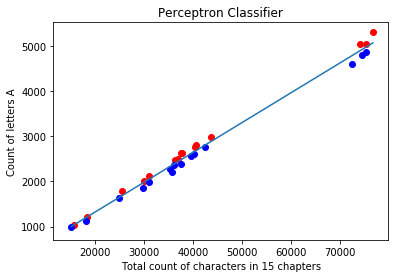

In [104]:
plt.scatter(x_fr, y_fr, color='red')
plt.scatter(x_en, y_en, color='blue')
plt.plot([min(x_fr + x_en), max(x_fr + x_en)],
             [-w[1] * min(x_fr + x_en) - w[0], -w[1] * max(x_fr + x_en) - w[0]])

plt.xlabel('Total count of characters in 15 chapters')
plt.ylabel('Count of letters A')
plt.title('Perceptron Classifier')

### Evaluation
Evaluate your perceptron using the **leave-one-out cross validation** method. You will have to train and run 30 models. In each train/run session, you will train on 29 samples and evaluate on the remaining sample. You have then either a correct or a wrong classification. You will sum these classifications, i.e. the number of **correct classifications**, to get your final evaluation, for instance 29/30.

In [108]:
# Write your code here
def leave_one_out_cross_val(X, y, fitting_function):
#def loo_cross_validation(X, y, classifier):
    #mismatches = 0
    matches = 0
    
    for i in range(len(X)):
        w = np.zeros(X.shape[1]).reshape(-1, 1)
        #print("Fold ", i, "on 30: ")
        
        # split the dataset
        x_test = X[i]
        X_train = np.delete(X, i, 0)
        
        y_test = y[i]
        y_train = np.delete(y, i)
        
        # Use the selected classifier to derive the weights 
        #w = classifier(X_train, y_train,1.0, w)
        w = fitting_function(X_train, y_train, 100, 1000, 1.0e-4)
        #w = fit_stoch_perceptron(XXX_norm, y, alpha, 1000, 30 )
        
        # Check which class the classifier predicted for the test set.
        y_tilde = 1 if x_test @ w >= 0 else 0 
        
        # Check if the predicted class is correct
        # otherwise we increase the error count by 1.
        #if y_test != y_tilde: 
        if y_test == y_tilde: 
            #mismatches += 1
            #print('Correct')
            matches += 1
    
        print("Fold ", i, "on 30: ")
    #print('Error rate: ',mismatches)
    #print(" === Evaluation using Leave-one-out cross validation === \n") 
    print('Correct classifications: ',matches)
    #return mismatches / len(X) # Return the error rate.
    return matches / len(X) # Return the accuracy.

# Fold 2 on 30: epochs: 43, weights: [0.0, -4.842932551319658, 5.063629518072292]: Correct.


In [109]:
#print("=== Evaluation using Leave-one-out cross validation === \n")
#stoch_accuracy = leave_one_out_cross_val(X_norm, y, fit_stoch)
stoch_accuracy = leave_one_out_cross_val(XXX_norm, y, fit_stoch_perceptron)
print('Cross-validation accuracy (stochastic):', stoch_accuracy)

Misclassified observations:  17
Epochs:  999
Fold  0 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  1 on 30: 
Misclassified observations:  23
Epochs:  999
Fold  2 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  3 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  4 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  5 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  6 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  7 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  8 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  9 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  10 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  11 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  12 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  13 on 30: 
Misclassified observations:  17
Epochs:  999
Fold  14 on 30: 
Misclassified observations:  18
Epochs:  999
Fold  15 on 30: 
Misclassified obse

## 3 - Logistic Regression <a name="t3"/>
From your perceptron program, implement logistic regression. You can either follow the description from the textbook, S. Russell and R. Norvig, _Artificial Intelligence_, 2010, pages 725--727, or the slides. You can either implement the stochastic or the batch version of the algorithm, or both versions. As **stop criterion**, you will use either the norm of the gradient or the norm of the difference between two consecutive weight vectors. You will also set a **maximal number of epochs**. Run the resulting program on your data set.

#### Logistic activation function
Write the logistic function, where the $x$ input is a real number.

In [127]:
# Write your code here
def logistic(x):
    return 1 / (1 + np.exp(-x))


### The `predict(X, w)` function

Write a `predict_proba()` function that given a matrix of observations $\mathbf{X}$ and a weight vector $\mathbf{w}$ will return a **vector of probabilities** to belong to class 1: The vector will consist of $P(1|\mathbf{x}_i)$ for all the $i$ rows of $\mathbf{X}$.

In [128]:
# Write your code here
def predict_proba(X, w):
     return X @ w


Write a `predict(X, w)` function that given a matrix of observations $\mathbf{X}$ and a weight vector $\mathbf{w}$ will return the class. You will use `predict_proba()` and set the threshold to belong to class 1 to 0.5.

In [129]:
# Write your code here
def predict(X, w):
    probs = logistic(predict_proba(X, w))
    return probs


### The `fit(X, y)` function

You will now write the `fit(X, y)` function as with the perceptron. You may call it `fit_stoch(X, y)` or `fit_batch(X, y)`. Use the parameters given in the cell below.

In [130]:
# Write your code here
import random
def fit_stoch_logistic(X, y, alpha=100,
              epochs=1000,
              epsilon=1.0e-4,
              verbose=False):
    """
    Stochastic gradient descent
    :param X:
    :param y:
    :param alpha:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs, logs_stoch
    logs = []
    logs_stoch = []
    random.seed(0)
    """
    In the algorithm, we have assumed a fixed learning rate $\alpha = 100$ 
    and by slowly letting the learning rate $\alpha$ decrease to zero as 
    the algorithm runs, by multiplying by 0.99. 
    In this way, it is possible to ensure that the parameters will converge 
    to the global minimum rather than merely oscillate around the minimum.
    """
    
    idx = list(range(len(X)))
    #print(idx)
    #alpha = 100
    
    w = np.zeros(X.shape[1]).reshape((-1, 1))
    
    
    #for epoch in range(500):
    for epoch in range(epochs):
        random.shuffle(idx)
        avrageGrad = np.zeros(X.shape[1]).reshape((-1, 1))
        
        w_old = w
        #alpha *= 0.99
        
        for i in idx:
            
            # the loss function 
            
            # in case of gradient descent method
            #loss = y[i] - X[i] @ w    # here hw_gradient = x*w
            #gradient = loss * X[i].reshape(-1, 1)
            
            # in case of perceptron method
            #h_w = hw_threshold(X, w)
            #delta = y[i] - h_w[i]
            
            # in case of logistic regression
            #h_w = hw_logistic(X, w)
            
            #h_w = logistic(X[i] @ w)
            #h_w = probability(X[i], w)
            #print(h_w)
            #delta = (y[i] - h_w[i])
            #delta = (y[i] - logistic(X[i] @ w))    # slide 47
            delta = y[i] - predict(X[i], w)
            
            # DEBUGGING
            #print("delta", delta.shape)
            #print("X", X.shape)
            #print("Xi", X[i].shape)
            #print("w", w.shape)
                        
            #delta = (y[i] - h_w) * h_w * (1 - h_w)
            #delta = (y[i] - h_w[i]) * h_w[i] * (1 - h_w[i])  # Aima eq 18.8 
            #delta = (y[i] - h_w) @ h_w.T @ (1 - h_w)
            
            gradient = delta * X[i].reshape(-1, 1)
            #print("Gradient", np.linalg.norm(gradient))
            avrageGrad = avrageGrad + gradient
            
            # the weight updating rule
            #w = w + alpha * gradient
            #w = w + alpha * delta * X[i].reshape(-1, 1)  # shapes (30,1) (3,1)
            w = w + alpha * gradient
            
            logs_stoch += (w, alpha, sse(X, y, w))
            
        if np.linalg.norm(avrageGrad) < epsilon:
        #if np.linalg.norm(w - w_old) / np.linalg.norm(w) < epsilon:
            print("Epochs", epoch)
            break
            
        logs += (w, alpha, sse(X, y, w))
        
    return w
    


In [131]:
print("=== Stochastic Descent Logistic === \n")
#w = fit_stoch(X_norm, y, verbose=True)
w = fit_stoch_logistic(XXX_norm, y, verbose=True)
weights = w.reshape(1,-1).tolist()
print("Logistic Weights: \n", weights)

=== Stochastic Descent Logistic === 

Epochs 596
Logistic Weights: 
 [[2.073225839414742, -3769.1505527855234, 3952.204257002531]]


In [132]:
w = [w[i] / maxima[i] for i in range(len(w))]
print("Logistic Restored Weights \n", w)
w = [w[j] / w[-1] for j in range(len(w))]
print("Weights with y set to 1 \n", w)

Logistic Restored Weights 
 [array([2.07322584]), array([-0.04912546]), array([0.74401436])]
Weights with y set to 1 
 [array([2.7865401]), array([-0.06602756]), array([1.])]


### Visualizing the results

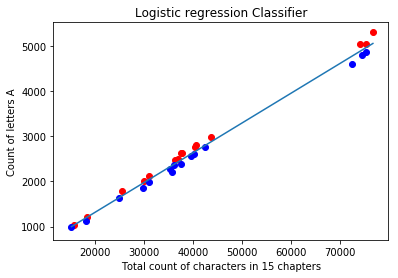

In [133]:
plt.scatter(x_fr, y_fr, color='red')
plt.scatter(x_en, y_en, color='blue')
plt.plot([min(x_fr + x_en), max(x_fr + x_en)],
         [-w[1] * min(x_fr + x_en) - w[0], -w[1] * max(x_fr + x_en) - w[0]])

plt.xlabel('Total count of characters in 15 chapters')
plt.ylabel('Count of letters A')

plt.title('Logistic regression Classifier')
plt.show()

### Evaluation
Evaluate your logistic regression using the **leave-one-out cross validation** method as with the perceptron

In [71]:
# Write your code here
#def leave_one_out_cross_val(X, y, fitting_function):
#def leave_one_out_cross_val(XXX_norm, y, fit_stoch_logistic):


In [120]:
stoch_accuracy_logistic = leave_one_out_cross_val(XXX_norm, y, fit_stoch_logistic)
print('Cross-validation accuracy (batch):', stoch_accuracy_logistic)

Fold  0 on 30: 
Epochs 642
Fold  1 on 30: 
Epochs 359
Fold  2 on 30: 
Epochs 982
Fold  3 on 30: 
Epochs 645
Fold  4 on 30: 
Epochs 537
Fold  5 on 30: 
Epochs 636
Fold  6 on 30: 
Fold  7 on 30: 
Epochs 824
Fold  8 on 30: 
Epochs 683
Fold  9 on 30: 
Epochs 571
Fold  10 on 30: 
Epochs 685
Fold  11 on 30: 
Epochs 576
Fold  12 on 30: 
Epochs 604
Fold  13 on 30: 
Epochs 458
Fold  14 on 30: 
Epochs 681
Fold  15 on 30: 
Epochs 571
Fold  16 on 30: 
Epochs 853
Fold  17 on 30: 
Epochs 561
Fold  18 on 30: 
Fold  19 on 30: 
Epochs 696
Fold  20 on 30: 
Fold  21 on 30: 
Epochs 639
Fold  22 on 30: 
Epochs 440
Fold  23 on 30: 
Fold  24 on 30: 
Epochs 531
Fold  25 on 30: 
Epochs 561
Fold  26 on 30: 
Epochs 981
Fold  27 on 30: 
Epochs 440
Fold  28 on 30: 
Epochs 528
Fold  29 on 30: 
Correct classifications:  29
Cross-validation accuracy (batch): 0.9666666666666667


## Visualizing the logistic surface

In [134]:
def plot_logistic_surf(x_range, y_range, w_opt):
    z_axis = np.array([[0.0] * len(y_range) for i in range(len(x_range))])
    x_axis, y_axis = np.meshgrid(x_range, y_range)
    z_axis = z_axis.reshape(x_axis.shape)

    # We compute the probability surface as a function of x and y
    for i in range(len(x_range)):
        for j in range(len(y_range)):
            z_axis[j, i] = logistic(np.dot([1, x_range[i], y_range[j]], w_opt))
    return x_axis, y_axis, z_axis

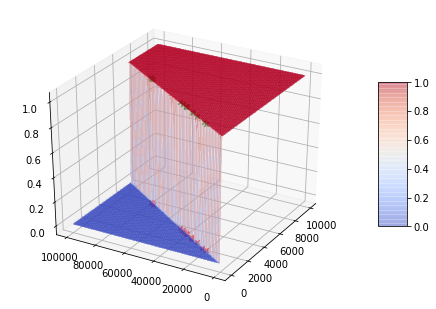

In [135]:
x_range = np.linspace(0, 100000, 200)
y_range = np.linspace(0, 10000, 200)
#w = [2.073225839414742, -0.049125455233437906, 0.7440143556104162]

x_axis, y_axis, z_axis = plot_logistic_surf(x_range, y_range, w)

fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.gca(projection='3d')

surf = ax.plot_surface(y_axis, x_axis, z_axis, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
# We plot the observations
for x, y_class in zip(X, y):
    if y_class == 1:
        ax.scatter(x[2], x[1], y_class, color='green', marker='x')
    else:
        ax.scatter(x[2], x[1], y_class, color='red', marker='x')

ax.elev = 30 
ax.azim = -150
plt.show()

## Programming logistic regression with popular APIs <a name="t4"/>
Should you use logistic regression in a project, you will probably resort to existing libraries. In the next cells, you will apply the logistic regression classification with two popular APIs:
1. sklearn
2. Keras

`sklearn` is included in anaconda.
You will install the rest with:
```
pip install --upgrade keras tensorflow tensorflow-addons 
```
You will read and run the code in the cells below.

All these APIs are built on numpy and we convert the dataset into numpy if you have not done it already

In [136]:
X = np.array(X)
X_norm = np.array(X_norm)
y = np.array(y)

They also handle the **intercept** so we do not need the first column of ones.

In [137]:
X = X[:, 1:]
X_norm = X_norm[:, 1:]

### sklearn
Using the dataset of English and French datapoints, we apply **logistic regression with the sklearn API**. We need the `LogisticRegression` class, the `fit()` and `predict()` functions. The **weights** are in the `coef_` field.

In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X, y)
model.coef_

array([[-0.03319476,  0.50366331]])

We predict the classes of the $\mathbf{X}$ with the `predict()` function

In [139]:
model.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

We predict the **class probabilities** of the $\mathbf{X}$ with the `predict_proba()` function

In [140]:
model.predict_proba(X)

array([[1.00000000e+00, 3.74342280e-30],
       [9.99999999e-01, 1.11132347e-09],
       [9.90643749e-01, 9.35625091e-03],
       [1.00000000e+00, 3.53486952e-12],
       [1.00000000e+00, 2.21451661e-22],
       [1.00000000e+00, 5.10324065e-11],
       [1.00000000e+00, 3.67755819e-24],
       [1.00000000e+00, 1.02028952e-16],
       [1.00000000e+00, 4.08993804e-12],
       [9.94443811e-01, 5.55618851e-03],
       [9.89127346e-01, 1.08726538e-02],
       [1.00000000e+00, 6.03322127e-11],
       [1.00000000e+00, 5.16662097e-41],
       [1.00000000e+00, 1.51674633e-21],
       [1.00000000e+00, 6.79268599e-16],
       [2.22044605e-15, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.04608581e-02, 9.79539142e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.42263534e-09, 9.99999999e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

### Keras
Using the dataset of English and French datapoints, we apply logistic regression with Keras. We need the `Sequential` and `Dense` classes.

In [141]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

C:\Users\hashu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [142]:
# Write your code here
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### We fit the model

In [151]:
model.fit(X, y, epochs=4000, batch_size=4, verbose=0)

In [152]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [153]:
model.predict(X)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [154]:
model.predict_classes(X)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

If you do not obtain a correct classification, rerun the training with more epochs.

## Reading <a name="t5"/>
You will read the article *An overview of gradient descent optimization algorithms* by Ruder (2017) and you will outline the main characteristics of all the **optimization algorithms** the author describes. This part should be of about one to two pages. Link to the article: https://arxiv.org/abs/1609.04747

If you understand French, or using Google translate, you may also want to read the original article on gradient descent by Cauchy here:  https://gallica.bnf.fr/ark:/12148/bpt6k2982c/f540.item.


### Report

The assignment must be documented in the report, which should contain the following:

*   The name of the author, the title of the assignment, and any relevant information on the front page;
*   A presentation of the assignment and the possible improvements you would have brought;
*   A presentation of your implementation;
*   A print-out of the example set(s) and the resulting weight vectors;
*   Comments on the results you have obtained, including your cross validation;
*   A short dissertation on the optimization algorithms from Ruder's paper.

Please, typeset and format your report consistently. You must use Latex. Documents written using MS Word or any similar format will not be considered.

You may have a look at the code in the textbook code repository (or any other implementations), but the code you hand in must be your work.

## Submission
Submit the notebook and the report to Canvas (two files). Do not include the code printout in the report, but only comments on its interesting parts. You will submit the notebook as a separate file.